In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('../plotting.mplstyle')
import arviz as az
from makeCorner import *
import sys
sys.path.append("./../code/")
from piCurve import *
from load_data import *

For this run, we fit for a possibly polarized stochastic background in terms of Stokes I and V parameters, such that the expectation value of the cross-correlation statistic is

$$
\begin{aligned}
C(f) &= \gamma_I(f)\, \Omega^I(f) + \gamma_V(f)\, \Omega^V(f) \\[5pt]
    &= \Omega^I(f)\Big[\gamma_I(f) + \gamma_V(f)\, \Pi(f)\Big],
\end{aligned}
$$

We assume that $\Omega^I(f)$ is a power law, with a constant polarization fraction $\Pi$:

$$
C(f) = \Omega^I_0 \left(\frac{f}{f_0}\right)^{\alpha_I}\Big[\gamma_I(f) + \gamma_V(f)\, \Pi\Big],
$$

where $\Omega^I_0$ is defined at a reference frequency $f_0=25\,\mathrm{Hz}$.

Note that the cross-correlation statistic reported in LVK data releases is normalized as $Y(f) = C(f)/\gamma_I(f)$, so the signal model appearing in our code is actually 

$$
Y(f) = \Omega^I_0 \left(\frac{f}{f_0}\right)^{\alpha_I}\Big[1 + \frac{\gamma_V(f)}{\gamma_I(f)}\, \Pi\Big],
$$

A key for parameter names appearing below

| Name      | Description |
| :---------- | :---------- |
| `alpha_I`     | The spectral index on the total gravitational-wave background |
| `log_Omega_I` | Log10 of the reference amplitude of the total Stokes-I energy density |
| `pol_fraction` | The degree of polarization $\Omega^V/\Omega^I$, ranging from $-1$ to $1$ and assumed to be a constant |

First, load chains and print some summary statistics:

In [7]:
data = az.from_netcdf('stokes.cdf')
az.summary(data)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_I,-0.794,3.077,-6.691,4.840,0.085,0.068,1328.0,1370.0,1.0
log_Omega_I,-10.672,1.435,-12.973,-8.294,0.045,0.033,922.0,955.0,1.0
logit_log_Omega_I,-1.163,1.196,-3.238,0.770,0.042,0.031,922.0,955.0,1.0
logit_pol_fraction,-0.019,1.787,-3.392,3.548,0.044,0.045,1693.0,949.0,1.0
pol_fraction,-0.004,0.575,-0.988,0.874,0.014,0.013,1693.0,949.0,1.0


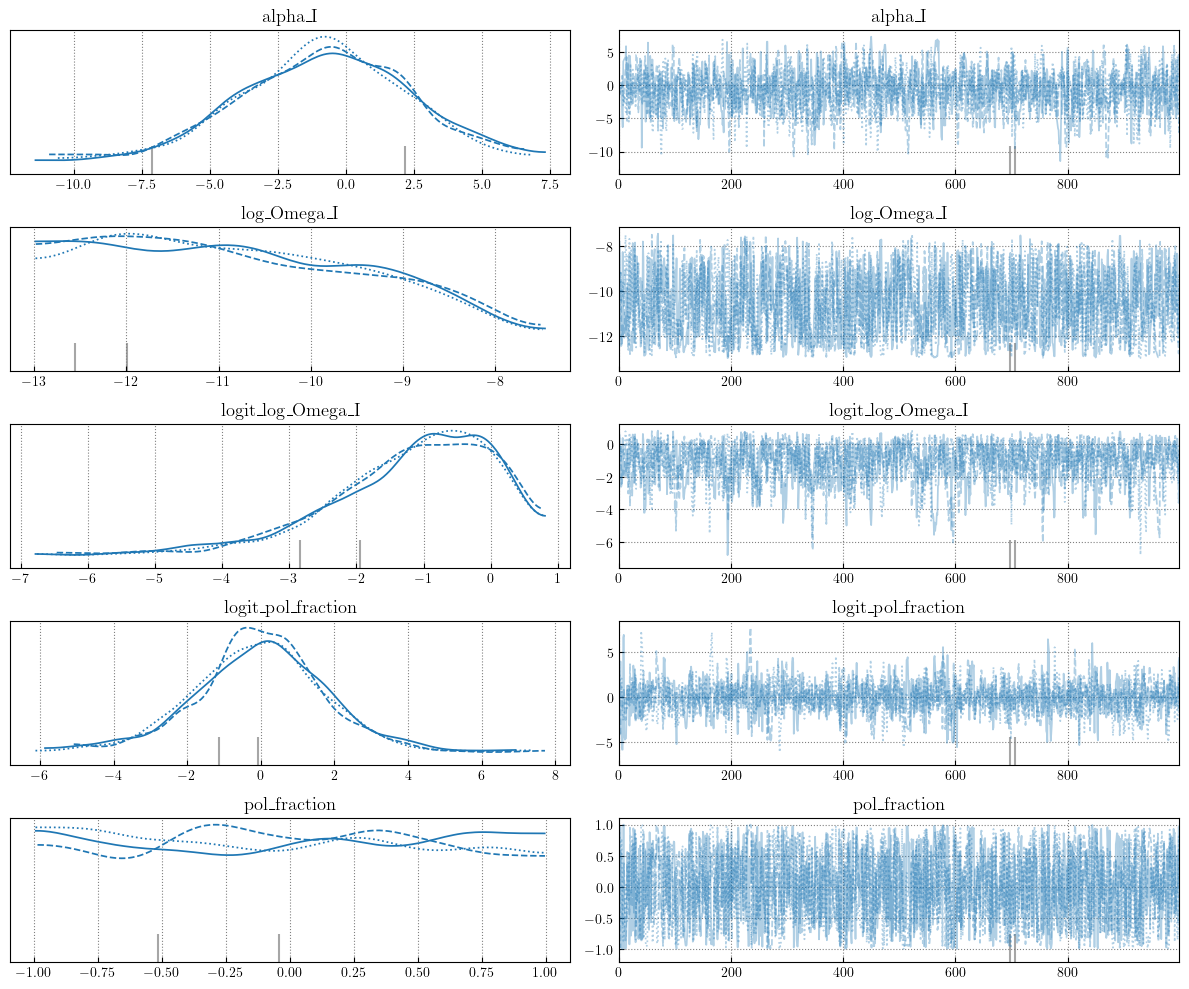

In [8]:
az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

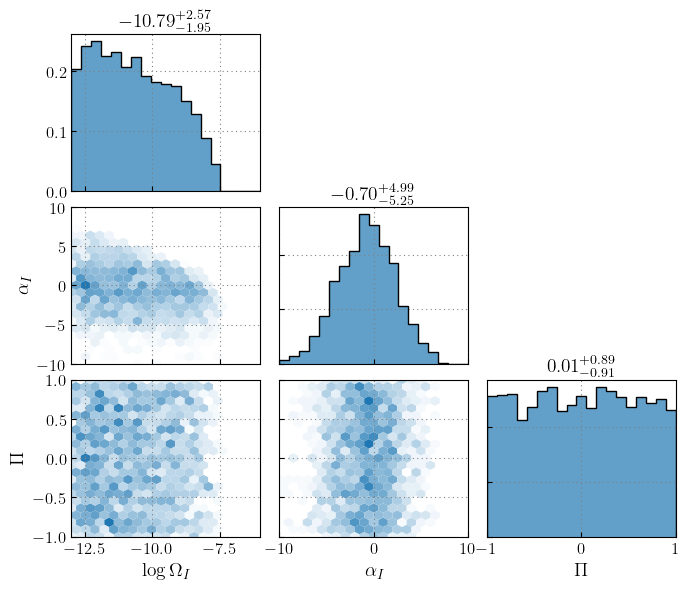

In [9]:
stacked_samples = data.posterior.stack(draws=("chain", "draw"))

fig = plt.figure(figsize=(7,6))
toPlot = {
    "OmgI":{"data":stacked_samples.log_Omega_I,"plot_bounds":(-13,-6),"label":r"$\log\Omega_I$"},
    "alphaI":{"data":stacked_samples.alpha_I,"plot_bounds":(-10,10),"label":r"$\alpha_I$"},
    "pi":{"data":stacked_samples.pol_fraction,"plot_bounds":(-1,1),"label":r"$\Pi$"}
}
plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()